<a href="https://colab.research.google.com/github/Raziel-JKM/Practice/blob/main/ai/EX03/Cat_whiskers_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mustache

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

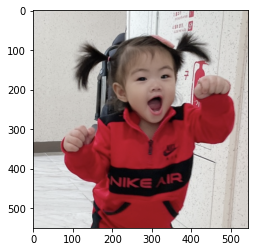

In [5]:
image = '/content/drive/MyDrive/Data/Mustache/img1.png'
# image = "2people.jpg"
# image = "sana.jpg"

img_bgr = cv2.imread(image) # OpenCV로 이미지 읽기
# img_bgr = cv2.resize(img_bgr, (800, 1200))
img_show = img_bgr.copy() # 출력용 이미지 별도 보관
plt.imshow(img_bgr)
# RGB로 출력
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

스티커 적용 위치 확인하기

In [6]:
import dlib

detector_hog = dlib.get_frontal_face_detector() # detector 선언

In [7]:
# detector를 이용해서 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)


찾은 얼굴 영역 좌표:  rectangles[[(239, 139) (368, 268)]]
찾은 사람의 수:  1


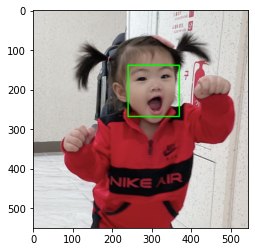

239 139 368 268


In [9]:
# 찾은 얼굴을 화면에 출력
print("찾은 얼굴 영역 좌표: ", dlib_rects) # 찾은 얼굴 영역 좌표
print("찾은 사람의 수: ", len(dlib_rects))

# 찾은 얼굴 영역의 사각형을 그려준다
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

print(l, t, r, b)

In [11]:
# landmark 모델 다운로드
    # ! wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
    # ! bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

IndentationError: ignored

In [16]:
# import os.path

# landmark_model ="/content/drive/MyDrive/Data/Mustache/shape_predictor_68_face_landmarks.dat"

# if not os.path.isfile(landmark_model):

SyntaxError: ignored

In [17]:
# 저장한 landmark 모델 불러오기
import os

model_path = "/content/drive/MyDrive/Data/Mustache/shape_predictor_68_face_landmarks.dat"
landmark_predictor = dlib.shape_predictor(model_path)

In [18]:
list_landmarks = [] # 여러 사람의 랜드마크가 들어갈 리스트

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

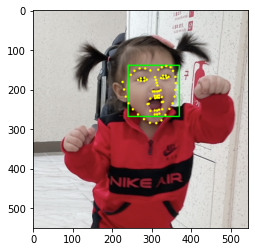

In [19]:
# 랜드마크를 영상에 출력
for landmark in list_landmarks:
    for idx, point in enumerate(landmark):
        cv2.circle(img_show, point, 3, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [21]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # 랜드마크에서 30번 코의 좌표
    x = landmark[30][0]
    y = landmark[30][1]
    
    # 얼굴 폭과 높이
    w = dlib_rect.width()
    h = dlib_rect.width()
    
    print(f"랜드마크에서 30번(코) 좌표: ({x}, {y})")
    print(f"얼굴 크기(Width, Height): ({w}, {h})")

랜드마크에서 30번(코) 좌표: (313, 190)
얼굴 크기(Width, Height): (130, 130)


(130, 130, 3)


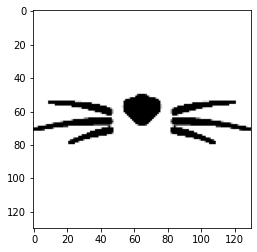

In [25]:
# 스티커 이미지 출력
sticker_path = "/content/drive/MyDrive/Data/Mustache/cat.png"
img_sticker = cv2.imread(sticker_path)

img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커의 크기를 얼굴 랜드마크 크기로 resize

# sticker_copy
sticker_copy = img_sticker.copy()

print (img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

In [27]:
# 이미지의 좌표 조정
# 스티커 이미지 정중앙보다 약간 왼쪽 위에 고양이 코가 있으므로
# 사진상의 코와 스티커의 정중앙을 맞춰주자

refined_x = int(x - w//2.05)       # left
refined_y = int(y - w//2.1)       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (250,129)


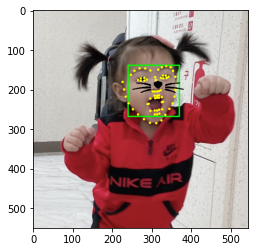

In [28]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
# 흰색이 아닌 검은색 코와 수염 부분만 스티커로 사용하기 위해
# np.where를 통해 img_sticker 가 255 인 부분은 sticker_area를 사용하고
# 255가 아닌 부분을 img_sticker를 사용해서 img_show 에 다시 적용

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

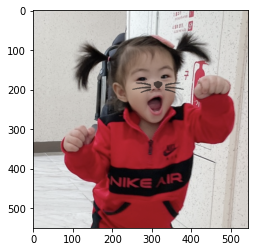

In [29]:
# bounding box와 landmark를 제거하기 위해 원본을 불러와서 최종 결과만 출력

sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area, cv2.addWeighted(img_sticker, 0.6, sticker_area, 0.4, 0)).astype(np.uint8)
# cv2.addWeighted 를 사용해서 투명도 조절

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()